      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  501.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284341   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.705587   
min      0.006320    0.000000    0.460000    

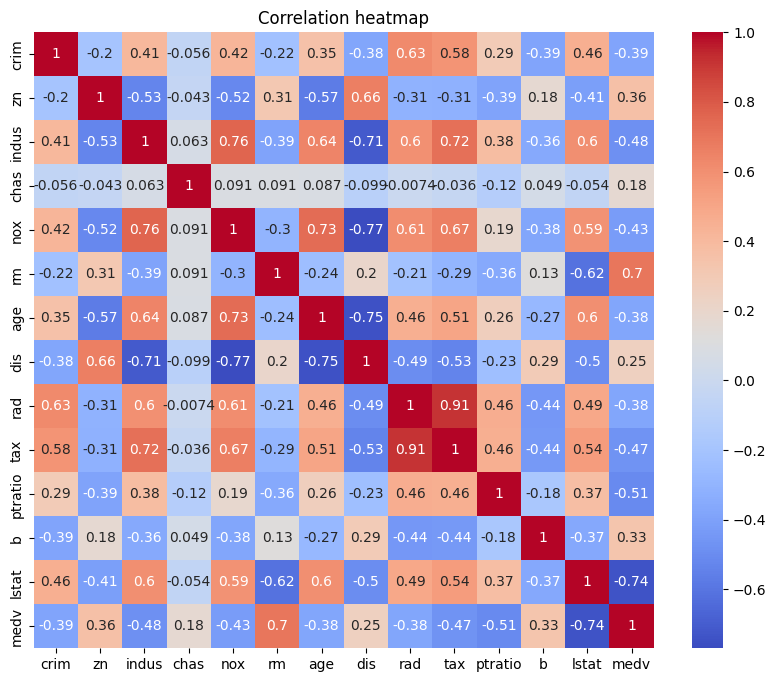

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data=pd.read_csv('BostonHousing.csv')
print(data.head())
print(data.describe())
print(data.isnull().sum())
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")
plt.title('Correlation heatmap')
plt.show()


In [5]:
data.fillna(data.mean(),inplace=True)
print("Missing values are filling")
print(data.isnull().sum)

Missing values are filling
<bound method DataFrame.sum of       crim     zn  indus   chas    nox     rm    age    dis    rad    tax  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  False   
504  False  False  False  False  False  False  False  False  False  False   
505  False  False  False  False  False  False  False  False  False  False   

     ptratio     

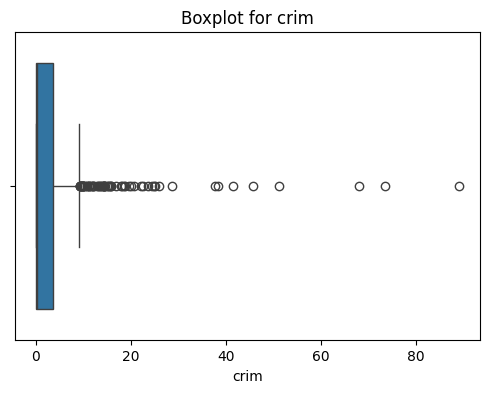

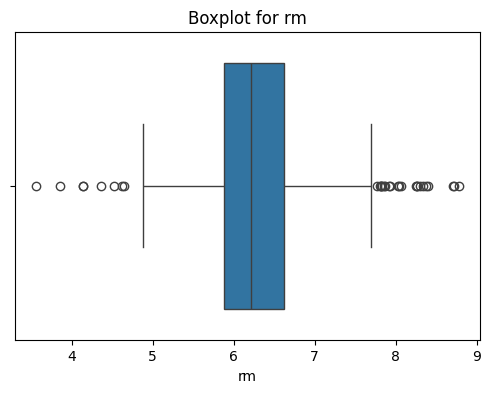

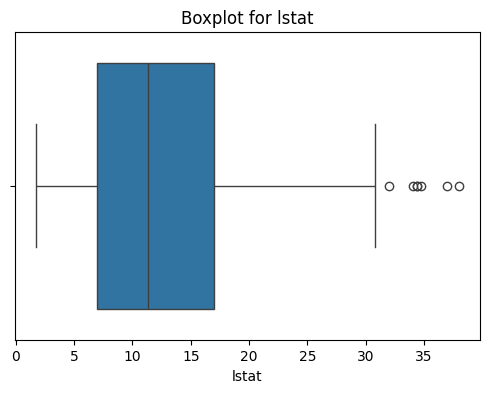

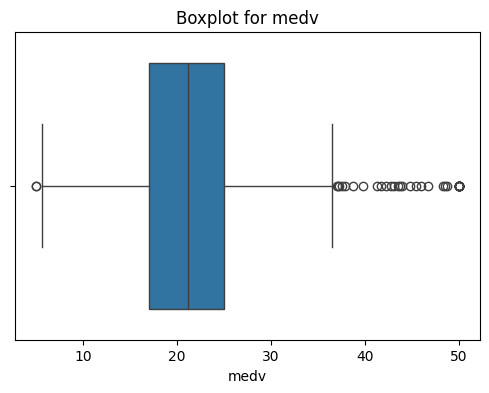

In [6]:
for column in['crim','rm','lstat','medv']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot for {column}')
    plt.show()

In [7]:
def remove_outliers(df,column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    lb=q1-1.5*iqr
    ub=q3+1.5*iqr
    return df[(df[column] >= lb)& (df[column]<=ub)]
data=remove_outliers(data,'crim')
data=remove_outliers(data,'rm')
data=remove_outliers(data,'lstat')
data=remove_outliers(data,'medv')


In [8]:
from sklearn.preprocessing import StandardScaler
#standardization of data
features_to_scale=['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'lstat', 'b']
scaler=StandardScaler()
data[features_to_scale]=scaler.fit_transform(data[features_to_scale])

print("date after scaling:")
print(data.head())

date after scaling:
       crim        zn     indus  chas       nox        rm       age       dis  \
0 -0.558874  0.277622 -1.226291     0  0.022818  0.804167  0.025691 -0.048527   
1 -0.549210 -0.512523 -0.496562     0 -0.605892  0.455655  0.522414  0.371109   
3 -0.546880 -0.512523 -1.246221     0 -0.706121  1.761445 -0.677697  0.895044   
5 -0.548040 -0.512523 -1.246221     0 -0.706121  0.476023 -0.209980  0.895044   
6 -0.521132  0.036188 -0.373919     0 -0.104746 -0.469940  0.076451  0.655013   

        rad       tax   ptratio         b     lstat  medv  
0 -0.896597 -0.544627 -1.547296  0.391963 -1.314038  24.0  
1 -0.759423 -0.919166 -0.324850  0.391963 -0.483021  21.6  
3 -0.622249 -1.057884  0.115231  0.359284 -1.721556  33.4  
5 -0.622249 -1.057884  0.115231  0.351942 -1.268092  28.7  
6 -0.347900 -0.440588 -1.596194  0.373248  0.174201  22.9  


In [9]:
from sklearn.model_selection import train_test_split


X = data.drop(columns=['medv'])  # Features
y = data['medv']  # Target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (298, 13)
Test set size: (75, 13)


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Load the dataset
data = pd.read_csv('BostonHousing.csv')  # Replace with the correct path to your file

# Handle missing values by filling them with the mean of each column
data.fillna(data.mean(), inplace=True)

# Define features (X) and target (y)
X = data.drop(columns=['medv'])  # Replace 'medv' with your target variable column
y = data['medv']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")


Root Mean Squared Error: 4.940124005341003
R² Score: 0.6672089705941886


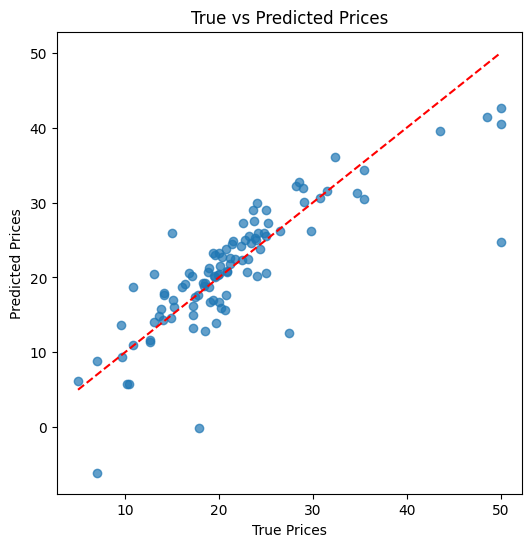

In [3]:
# Scatter plot of true vs predicted values
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("True vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.show()


In [4]:
import pickle

# Save the preprocessed data
data.to_csv('processed_housing_data.csv', index=False)

# Save the trained model
with open('house_price_model.pkl', 'wb') as f:
    pickle.dump(model, f)
